# <center> Cars Price Prediction
## <center> Module Building : XGBRegressor

<img src="Red-sport-car-isolated-on-transparent-background-PNG.png"     img>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,PolynomialFeatures
#from sklearn.linear_modele import LinearRegression
import seaborn as sns
import xgboost 
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score,cross_val_predict
from sklearn.metrics import r2_score,mean_absolute_error as mae,mean_squared_error as mse

In [2]:
df=pd.read_csv("Car Price Data_After_EDA.csv")
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,mark_model,Year,Power,Location,Kilométrage,Boite_de_vitesses,Date,...,Non_fumeur,Système_d'identification_du_conducteur,Radar_de_recul,Limiteur_de_vitesse,Verrouillage_centralisé_à_distance,Mark,Model,Annonce Month,Annonce Day,Annonce Year
0,0,0,3,PEUGEOT 206,2002,Diesel,Chefchaouen,300000.0,Manuelle,2022-01-31,...,0,0,0,0,0,PEUGEOT,206,1,31,2022
1,1,1,4,NISSAN Micra,2021,Diesel,Casablanca,70000.0,Manuelle,2022-07-19,...,1,1,1,1,1,NISSAN,Micra,7,19,2022
2,2,2,7,HYUNDAI Santa fe,2016,Diesel,Casablanca,155000.0,Automatique,2022-04-15,...,1,1,0,0,0,HYUNDAI,Santa fe,4,15,2022
3,3,3,9,FIAT Ducato,2006,Diesel,Temara,154000.0,Manuelle,2021-11-22,...,0,0,0,0,0,FIAT,Ducato,11,22,2021
4,4,4,10,PEUGEOT Boxer,2016,Diesel,Nador,93000.0,Manuelle,2021-06-26,...,0,0,0,0,0,PEUGEOT,Boxer,6,26,2021


In [3]:
df.drop(columns=["Link","mark_model","Date","Unnamed: 0.2","Unnamed: 0.1","Unnamed: 0"],inplace=True)

In [4]:
df=df[['Year', 'Power', 'Location', 'Kilométrage', 'Boite_de_vitesses',
       'Puissance_fiscale', 'Nombre_de_portes', 'Première_main', 'Couleur',
       'Carrosserie', 'Price','Mark',
       'Model']]
df.head()

,Year,Power,Location,Kilométrage,Boite_de_vitesses,Puissance_fiscale,Nombre_de_portes,Première_main,Couleur,Carrosserie,Price,Mark,Model
0,2002,Diesel,Chefchaouen,300000.0,Manuelle,7.0,5.0,0,Noir,Citadine,45000.0,PEUGEOT,206
1,2021,Diesel,Casablanca,70000.0,Manuelle,6.0,5.0,1,Bordeaux,Citadine,158000.0,NISSAN,Micra
2,2016,Diesel,Casablanca,155000.0,Automatique,9.0,5.0,1,Noir,Suv et 4x4,225000.0,HYUNDAI,Santa fe
3,2006,Diesel,Temara,154000.0,Manuelle,11.0,4.0,1,Blanc cassé,Utilitaire (van),300000.0,FIAT,Ducato
4,2016,Diesel,Nador,93000.0,Manuelle,9.0,5.0,1,Blanc,Utilitaire (van),162000.0,PEUGEOT,Boxer


In [5]:
peugeot=df[df["Mark"]=="PEUGEOT"]#["Model"]=="208"]
peugeot[peugeot["Model"]=="208"]["Carrosserie"].unique()

array(['Citadine', 'Compact', 'Coupé', 'Not Specified'], dtype=object)

In [6]:
Y=df["Price"]
X=df.drop(columns=["Price"])

num_df=X.select_dtypes(exclude="object")
cat_df=X.select_dtypes(include="object")
cat_df=cat_df.astype("category")
x=pd.concat([num_df,cat_df],axis=1)


x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.3,random_state=123)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(13367, 12) (13367,) (5729, 12) (5729,)


In [7]:
model_=[]
score_=[]
def predict(ml_model):
    #print('Model is: {}'.format(ml_model))
    model= ml_model.fit(x_train,y_train)
    print("Training score: {}".format(model.score(x_train,y_train)))
    predictions = model.predict(x_test)
    print("Predictions are: {}".format(predictions[0:5]))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mse(y_test,predictions)))
    print('MSE:{}'.format(mse(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mse(y_test,predictions))))
    model_.append(type(ml_model).__name__)
    score_.append(np.round(r2score,2))
    
     
    sns.distplot(y_test-predictions) 

In [8]:
xgb=xgboost.XGBRegressor(enable_categorical=True,
                        colsample_bytree=0.9,
                        colsample_bylevel=0.9,
                        colsample_bynode=0.9,
                        subsample=1,
                        tree_method="hist",
                        #max_delta_step=0,
                        max_depth=2,
                        learning_rate=0.35,
                        reg_alpha=0.9,
                        reg_lambda=0.9,
                        n_estimators=250,#,800,900,1000],#,800,900,1000],
                        min_child_weight=5,
                        random_state=123
                 
)
                     
            

Training score: 0.9332885162842295
Predictions are: [135498.   283581.88 338856.28 108190.39  71804.51]


r2 score is: 0.9089740194504852
MAE:571653706.5648357
MSE:571653706.5648357
RMSE:23909.280762181777


C:\Users\hp\AppData\Local\Temp\ipykernel_15700\3824652524.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


CPU times: total: 2.67 s
Wall time: 810 ms


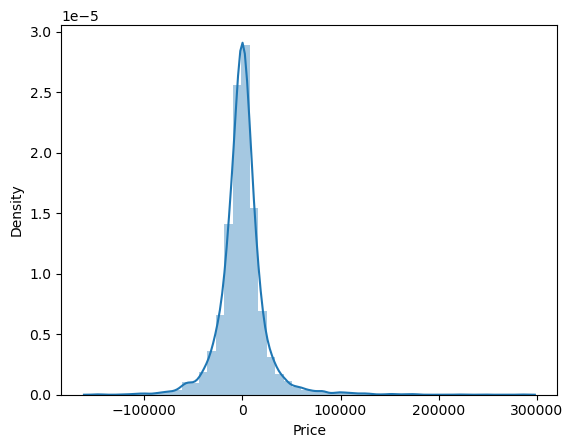

In [9]:
%%time
predict(xgb)

# Cross Validation:

In [24]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [26]:
r2_scors=cross_val_score(estimator=xgb,X=x,y=Y,cv=4,
                scoring="r2",
               n_jobs=-1)

In [29]:
r2_score=scors.mean()
score

0.9084788470438014

In [31]:
rmse=-cross_val_score(estimator=xgb,X=x,y=Y,cv=4,
                scoring="neg_root_mean_squared_error",
               n_jobs=-1)
rmse.mean()

23412.81532189319

In [37]:
predicts=cross_val_predict(estimator=xgb,X=x,y=Y,cv=4,
               n_jobs=-1)
len(predicts)

19096

In [40]:
np.sqrt(mse(predicts,Y))

23445.097708142508

In [42]:
xgb.fit(x,Y)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.9, colsample_bynode=0.9, colsample_bytree=0.9,
             early_stopping_rounds=None, enable_categorical=True,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.35, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=250, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=123, ...)

## Hyper Tunning XGBRegressor Model:

In [76]:
list(np.arange(0.1,1.0,0.1))
list(np.arange(0.10,1.00,0.10))
val=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9]

In [80]:
param={
       "booster":["gbtree", "gblinear","dart"],
       "colsample_bytree":val,
       "colsample_bylevel":val,
       "colsample_bynode":val,
       "reg_alpha":val,
       "reg_lambda":val,
       "subsample":val,
       #"gamma":[0,1,2,3,4,5],
       "learning_rate":[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1],#to 0.3
       "max_delta_step":[1,2,3,4,5],
       "max_depth":[1,2,3,4],
       "n_estimators":[100,200,300,400],#,800,900,1000],#,800,900,1000],
       "min_child_weight":[1,2,3,4],
       #"max_cat_threshold":[1,5,10]
       
      
}

#scorer = metrics.make_scorer(metrics.r2_score)

rs_xgb=RandomizedSearchCV(estimator=xgb,n_iter=500,cv=3,scoring="r2",
                          param_distributions=param,n_jobs=-1,verbose=1)

gs_xgb=GridSearchCV(estimator=xgb,
    param_grid=param,
    scoring="r2",
    n_jobs=-1,
    cv=3,
        )

In [10]:
%%time
#predict(rs_xgb)

CPU times: total: 0 ns
Wall time: 0 ns


In [61]:
%%time
print("hello")

hello
CPU times: total: 0 ns
Wall time: 996 µs


In [276]:
df["Boite_de_vitesses"]

0           Manuelle
1           Manuelle
2        Automatique
3           Manuelle
4           Manuelle
            ...     
19091       Manuelle
19092    Automatique
19093       Manuelle
19094    Automatique
19095       Manuelle
Name: Boite_de_vitesses, Length: 19096, dtype: object

In [43]:
my_car=pd.DataFrame({'Year':[2008,2018],
 'Power':["Essence","Diesel"],
 'Location':["Marrakech","Casablanca"],
 'Kilométrage':[165000,90000],
 'Boite_de_vitesses':['Manuelle',"Manuelle"],
 'Puissance_fiscale':[7,6],
 'Nombre_de_portes':[5,5],
 'Première_main':[0,0],
 'Couleur':["Bleu","Bleu"],
 'Carrosserie':['Citadine','Not Specified'],
 'Mark':["FORD","PEUGEOT"],
 'Model':["Fiesta","208"],
 #'Annonce Month':[7,7],
 #'Annonce Day':[25,25],
 #'Annonce Year':[2023,2023]
                    }
                     ,index=[0,1])


num_df=my_car.select_dtypes(exclude="object")
cat_df=my_car.select_dtypes(include="object")
cat_df=cat_df.astype("category")
My_Car=pd.concat([num_df,cat_df],axis=1)
My_Car

,Year,Kilométrage,Puissance_fiscale,Nombre_de_portes,Première_main,Power,Location,Boite_de_vitesses,Couleur,Carrosserie,Mark,Model
0,2008,165000,7,5,0,Essence,Marrakech,Manuelle,Bleu,Citadine,FORD,Fiesta
1,2018,90000,6,5,0,Diesel,Casablanca,Manuelle,Bleu,Not Specified,PEUGEOT,208


In [44]:
xgb.predict(My_Car)

array([ 63777.184, 201628.53 ], dtype=float32)

In [45]:
test_data=pd.read_csv("cleaned_car_test_data.csv")
y_data=test_data["Price"]
x_data=test_data.drop(columns=['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0','Link','mark_model','Date','Price'])
x_data=x_data[['Year', 'Power', 'Location', 'Kilométrage', 'Boite_de_vitesses',
       'Puissance_fiscale', 'Nombre_de_portes', 'Première_main', 'Couleur',
       'Carrosserie','Mark',
       'Model']]

In [46]:
num_df=x_data.select_dtypes(exclude="object")
cat_df=x_data.select_dtypes(include="object")
cat_df=cat_df.astype("category")
X_data=pd.concat([num_df,cat_df],axis=1)
X_data

,Year,Kilométrage,Puissance_fiscale,Nombre_de_portes,Première_main,Power,Location,Boite_de_vitesses,Couleur,Carrosserie,Mark,Model
0,2023,4000.0,6.0,5.0,0,Diesel,Casablanca,Manuelle,Not Specified,Not Specified,FIAT,500x
1,2022,9000.0,6.0,5.0,0,Diesel,Casablanca,Manuelle,Not Specified,Not Specified,JEEP,Renegade
2,2019,79000.0,6.0,5.0,0,Diesel,Casablanca,Automatique,Not Specified,Not Specified,JEEP,Renegade
3,2019,64000.0,6.0,5.0,0,Diesel,Casablanca,Automatique,Not Specified,Not Specified,JEEP,Renegade
4,2023,4000.0,7.0,5.0,0,Essence,Casablanca,Manuelle,Not Specified,Not Specified,FIAT,Panda
...,...,...,...,...,...,...,...,...,...,...,...,...
61,2021,39000.0,6.0,5.0,1,Diesel,Casablanca,Automatique,Not Specified,Not Specified,ALFA-ROMEO,Giulietta
62,2018,89000.0,6.0,5.0,0,Diesel,Casablanca,Manuelle,Not Specified,Not Specified,CITROEN,Berlingo
63,2021,54000.0,6.0,5.0,0,Diesel,Casablanca,Manuelle,Not Specified,Not Specified,RENAULT,Kangoo
64,2022,19000.0,6.0,5.0,0,Diesel,Casablanca,Manuelle,Not Specified,Not Specified,DACIA,Lodgy


In [91]:
X_data.columns

Index(['Year', 'Kilométrage', 'Puissance_fiscale', 'Nombre_de_portes',
       'Première_main', 'Power', 'Location', 'Boite_de_vitesses', 'Couleur',
       'Carrosserie', 'Mark', 'Model'],
      dtype='object')

In [47]:
pred=xgb.predict(X_data)

In [48]:
r2score=r2_score(y_data,pred)
r2score

0.12340464488270553

In [49]:
pd.DataFrame({"real price":y_data,"Predictions":pred})

,real price,Predictions
0,249999.0,162893.171875
1,285000.0,215573.609375
2,198950.0,188105.156250
3,217500.0,189215.640625
4,125000.0,208449.937500
...,...,...
61,225000.0,229729.234375
62,98000.0,128216.320312
63,139000.0,196263.640625
64,139000.0,384696.531250
